In [ ]:
%pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=92bb594b9c590cdc30d865905c7673c3c29446a6d9651ffda07bc0947fa87933
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd

# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpjl79kz3j
  JVM stdout: /tmp/tmpjl79kz3j/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpjl79kz3j/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 15 days
H2O_cluster_name:,H2O_from_python_unknownUser_l27ymq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Assuming your dataset is in a CSV file named 'heart_disease_dataset.csv'
df = pd.read_csv('heart.csv')

# Convert the Pandas DataFrame to an H2O Frame
h2o_df = h2o.H2OFrame(df)

# Identify predictors and response
x = h2o_df.columns[:-1]
y = 'target'

# For binary classification, response should be a factor
h2o_df[y] = h2o_df[y].asfactor()


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
# Run AutoML for 20 base models
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=h2o_df)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

# The leader model is stored here
best_model = h2o.get_model(aml.leaderboard[0, 'model_id'])
print("Best Model:")
print(best_model)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Best Model:
Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_3_AutoML_1_20240205_135250


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    255                255                         163145                 6            8            7.99216       19            60            46.1216

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 3.4251787246287406e-13
RMSE: 5.852502648123058e-07
LogLoss: 4.050784421329385e-07
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9999980890364183
       0    1    Error    Ra

In [ ]:
best_model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_3_AutoML_1_20240205_135250


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    255                255                         163145                 6            8            7.99216       19            60            46.1216

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 3.4251787246287406e-13
RMSE: 5.852502648123058e-07
LogLoss: 4.050784421329385e-07
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9999980890364183
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      499  0    0        (0.0/499.0)
1      0    526  0        (0.0/526.0)
Total  499  526  0        (0.0/1025.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.999998     1         26
max f2                       0.999998     1         26
max f0point5                 0.999998     1         26
max accuracy                 0.999998     1         26
max precision                1            1         0
max recall                   0.999998     1         26
max specificity              1            1         0
max absolute_mcc             0.999998     1         26
max min_per_class_accuracy   0.999998     1         26
max mean_per_class_accuracy  0.999998     1         26
max tns                      1            499       0
max fns                      1            475       0
max fps                      7.4575e-10   499       164
max tps                      0.999998     526       26
max tnr                      1            1         0
max fnr                      1            0.903042  0
max fpr                      7.4575e-10   1         164
max tpr                      0.999998     1         26

Gains/Lift Table: Avg response rate: 51.32 %, avg score: 51.32 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0117073                   1                  1.94867   1.94867            1                1            1                           1                   0.0228137       0.0228137                  94.8669   94.8669            0.0228137
2        0.0204878                   1                  1.94867   1.94867            1                1            1                           1                   0.0171103       0.039924                   94.8669   94.8669            0.039924
3        0.0321951                   1                  1.94867   1.94867            1                1            1                           1                   0.0228137       0.0627376                  94.8669   94.8669            0.0627376
4        0.0419512                   1                  1.94867   1.94867            1                1            1                           1                   0.0190114       0.081749                   94.8669   94.8669            0.081749
5        0.0526829                   1                  1.94867   1.94867            1                1            1                           1                   0.0209125       0.102662                   94.8669   9

In [ ]:
lb = aml.leaderboard
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_3_AutoML_1_20240205_135250,0.999611,0.0275358,0.999649,0.00585772,0.0865464,0.00749027
StackedEnsemble_AllModels_1_AutoML_1_20240205_135250,0.999589,0.0248239,0.99962,0.00685973,0.0805215,0.00648371
GBM_grid_1_AutoML_1_20240205_135250_model_1,0.999516,0.0327083,0.999551,0.00685973,0.0925782,0.00857073
StackedEnsemble_BestOfFamily_1_AutoML_1_20240205_135250,0.999493,0.0242163,0.99955,0.00585772,0.0759621,0.00577024
GBM_4_AutoML_1_20240205_135250,0.999486,0.0328543,0.999535,0.00870943,0.0942061,0.00887479
DRF_1_AutoML_1_20240205_135250,0.99927,0.0639042,0.999333,0.0128718,0.113105,0.0127926
GBM_2_AutoML_1_20240205_135250,0.999051,0.0380566,0.999171,0.00986574,0.0972259,0.00945288
DeepLearning_grid_2_AutoML_1_20240205_135250_model_1,0.998792,0.0447841,0.998903,0.0174189,0.114961,0.013216
GBM_5_AutoML_1_20240205_135250,0.998468,0.0338672,0.998787,0.00855513,0.0910518,0.00829042
GBM_grid_1_AutoML_1_20240205_135250_model_2,0.99819,0.0381088,0.998607,0.00986574,0.0921851,0.0084981


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_3_AutoML_1_20240205_135250

,0,1,Error,Rate
0,499.0,0.0,0.0,(0.0/499.0)
1,0.0,526.0,0.0,(0.0/526.0)
Total,499.0,526.0,0.0,(0.0/1025.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

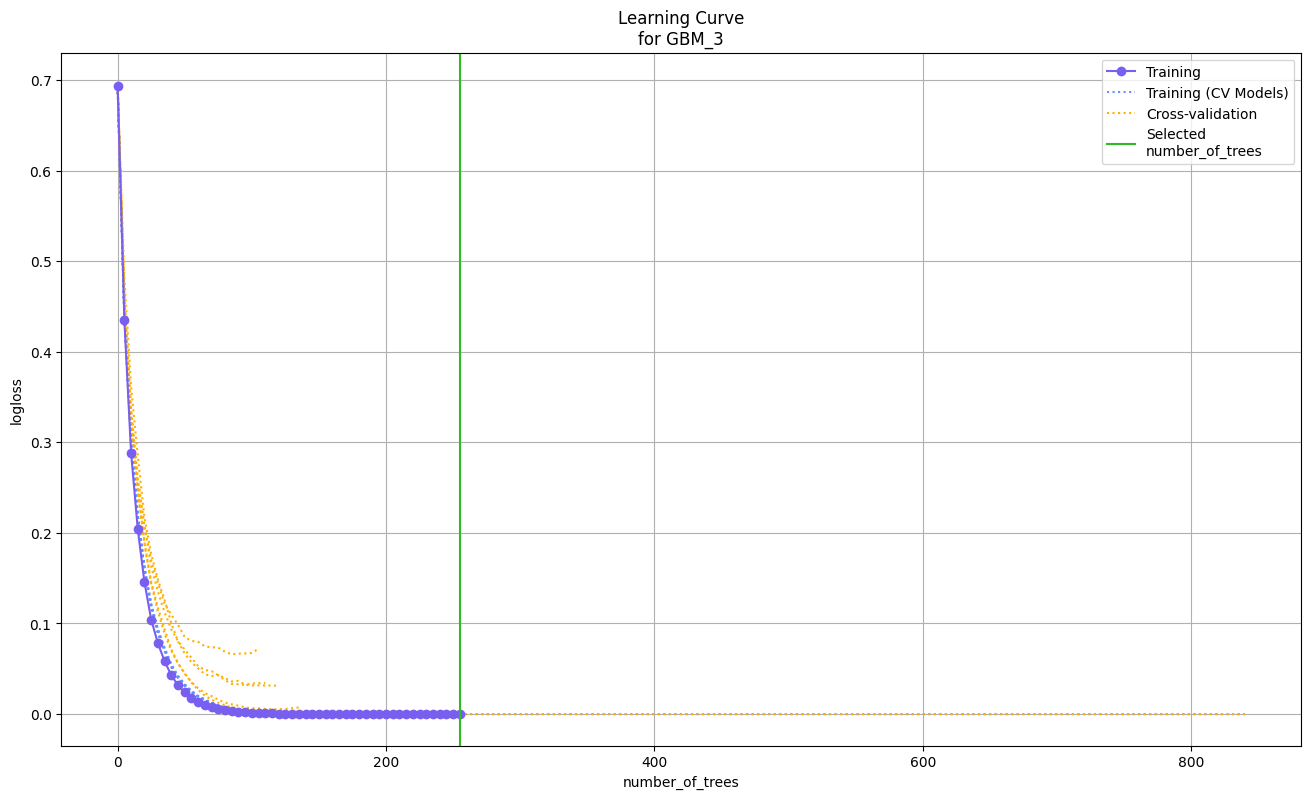

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

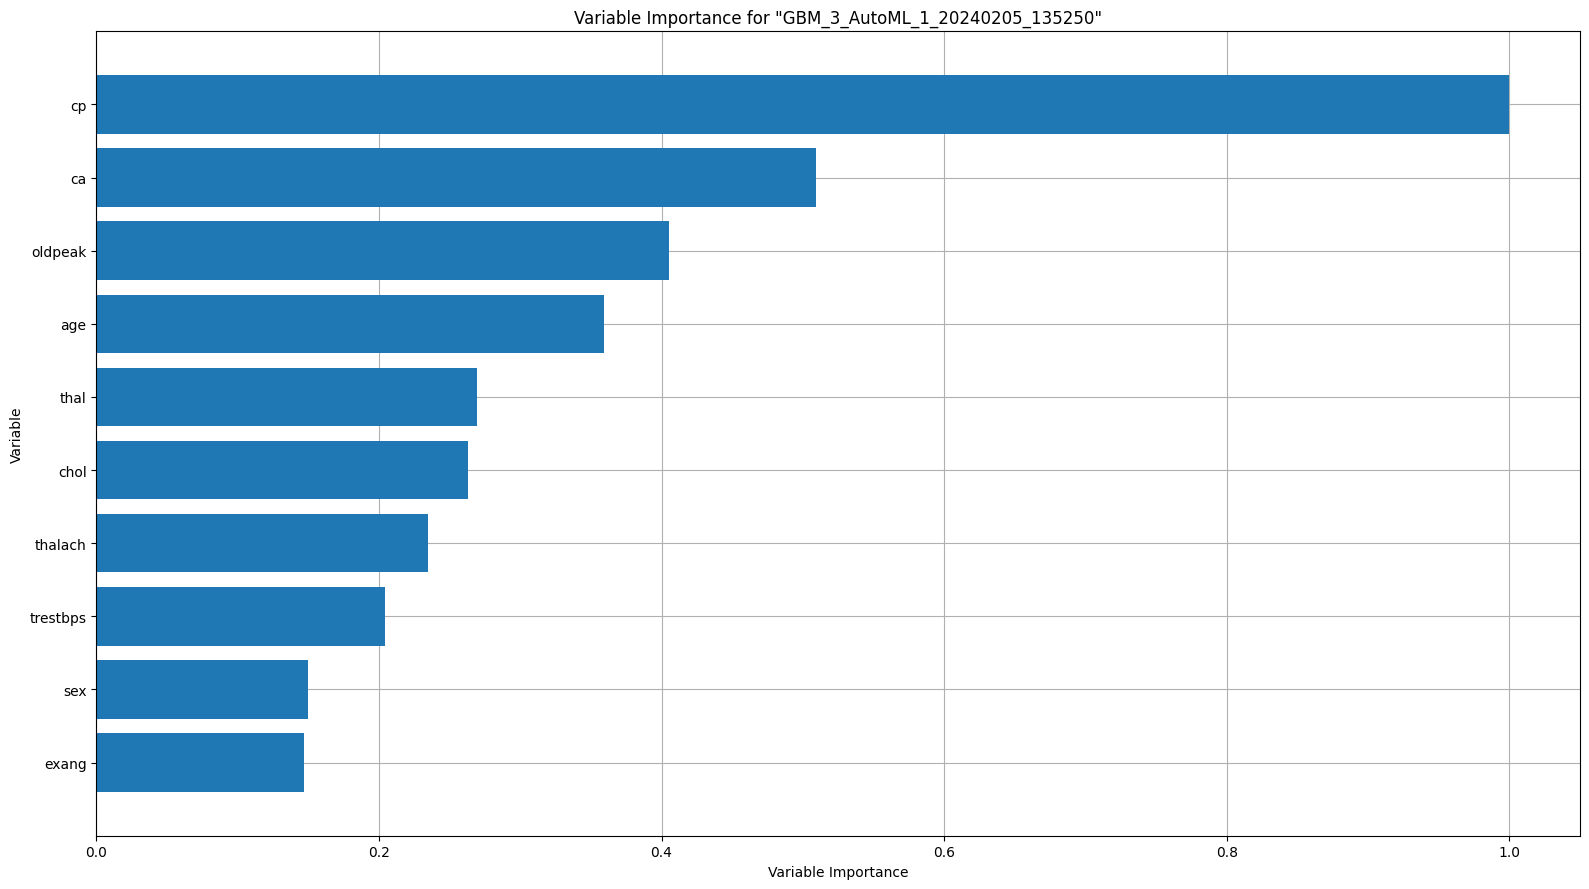

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

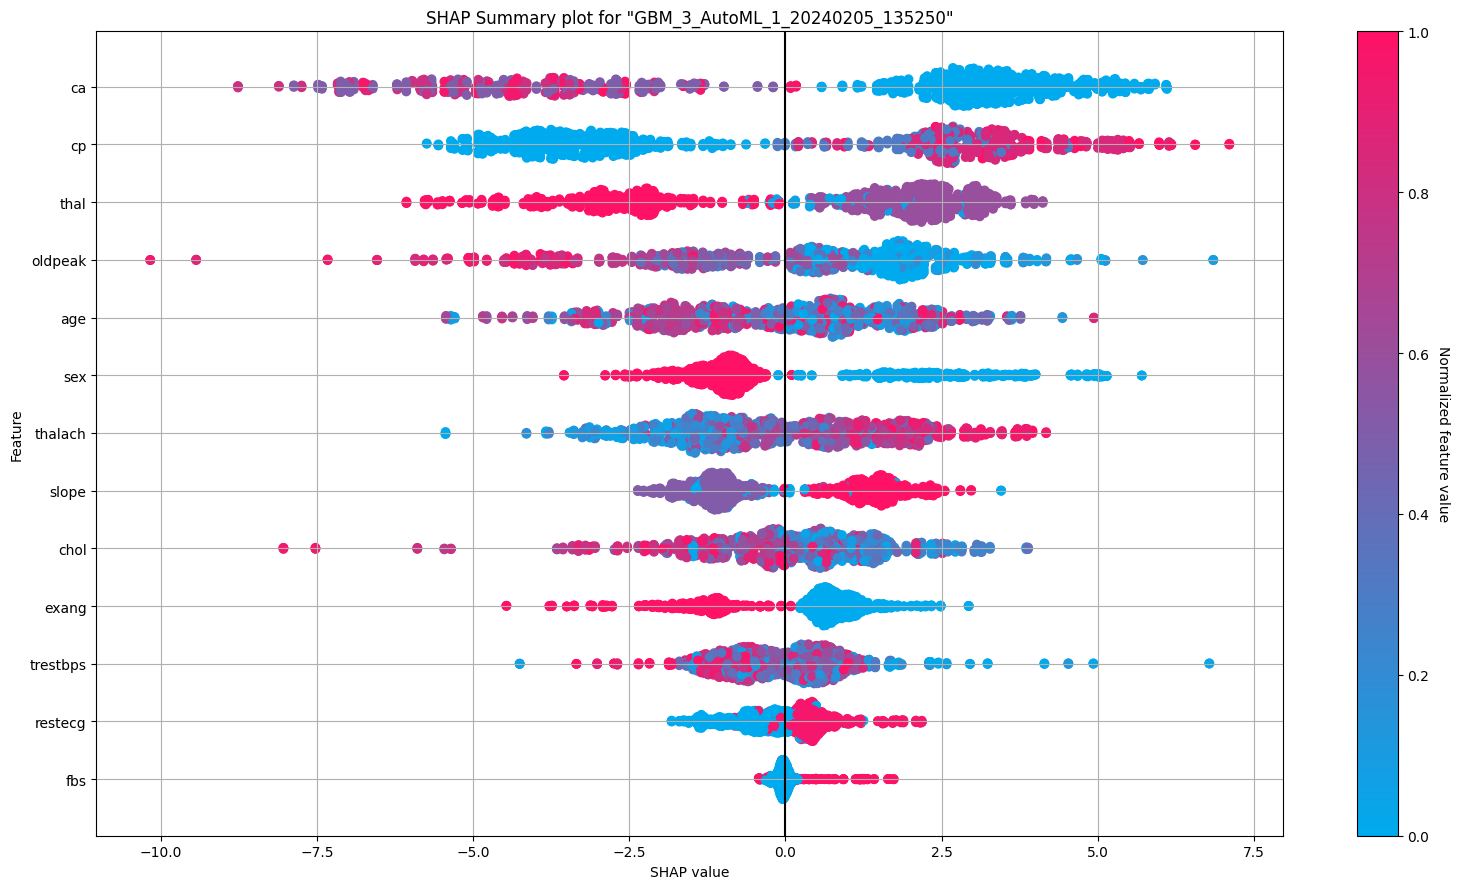

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

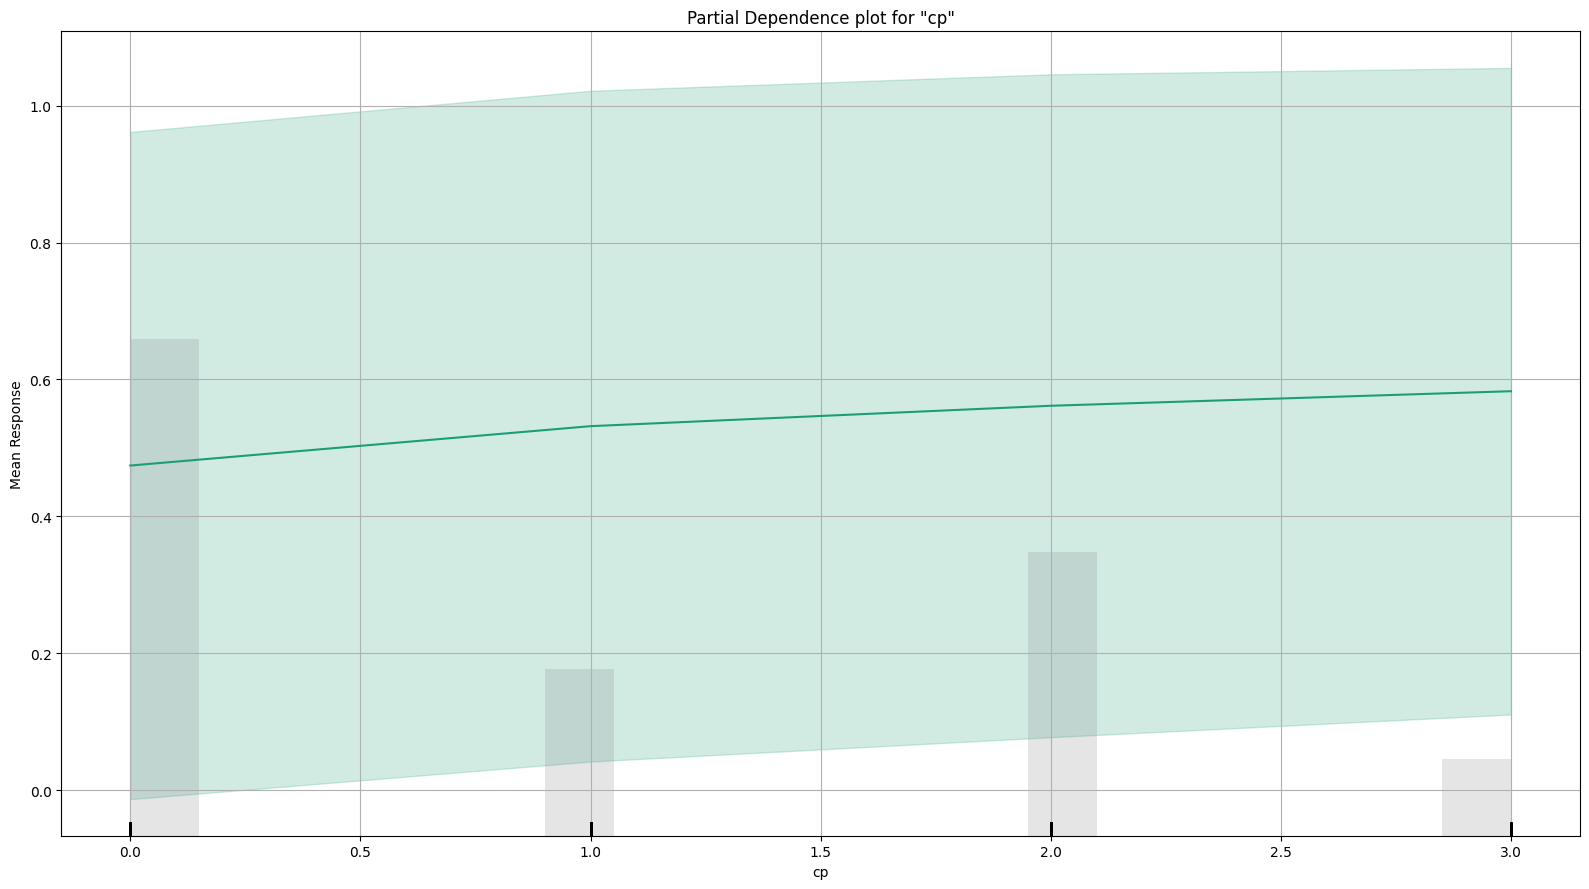

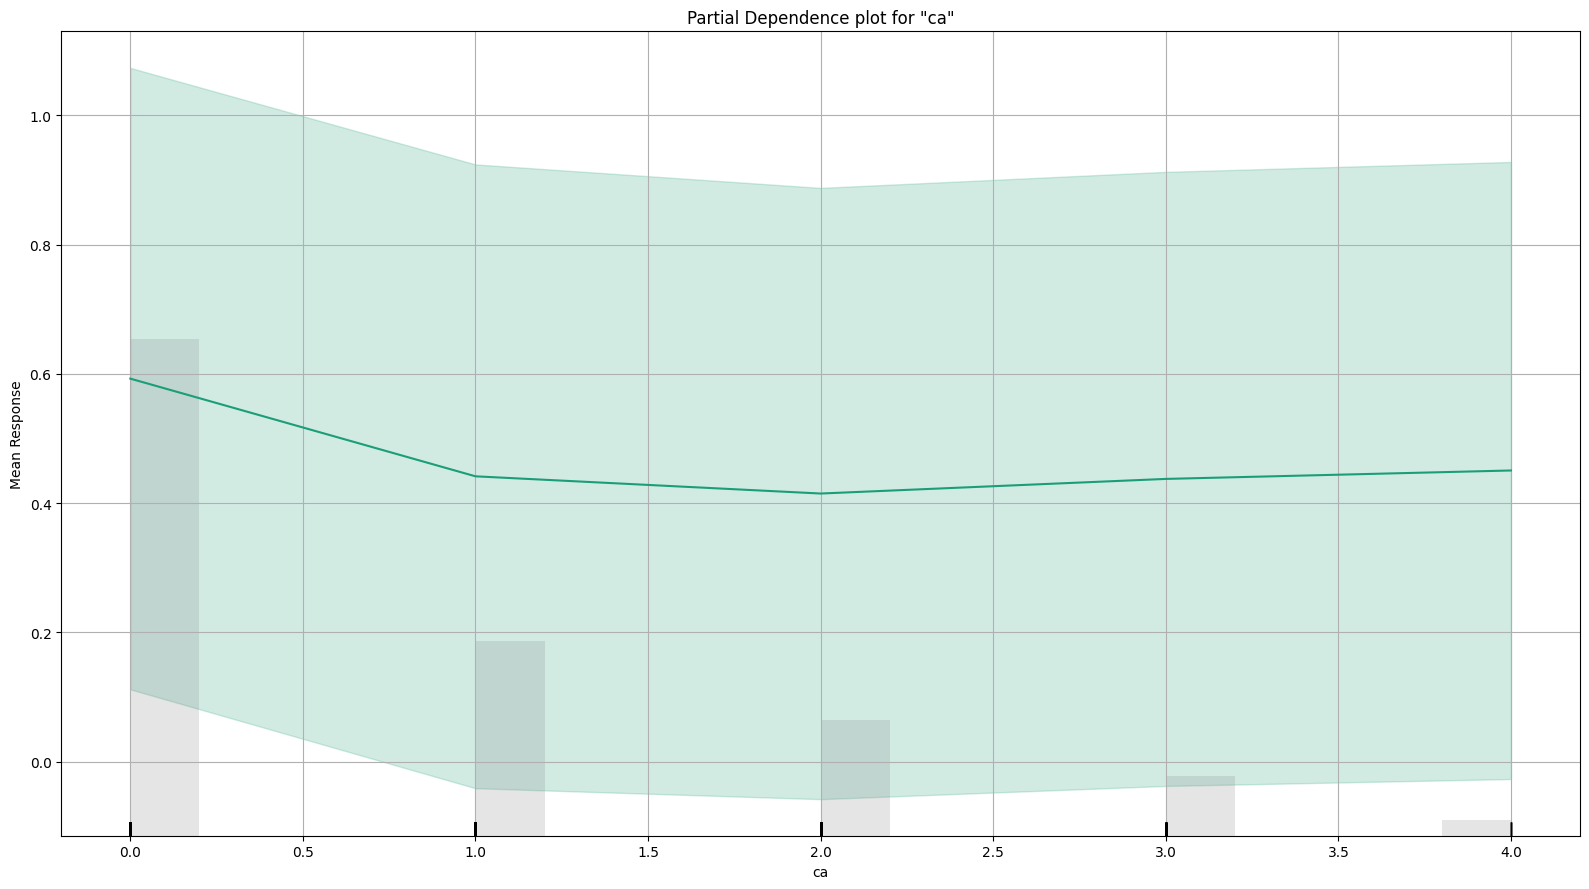

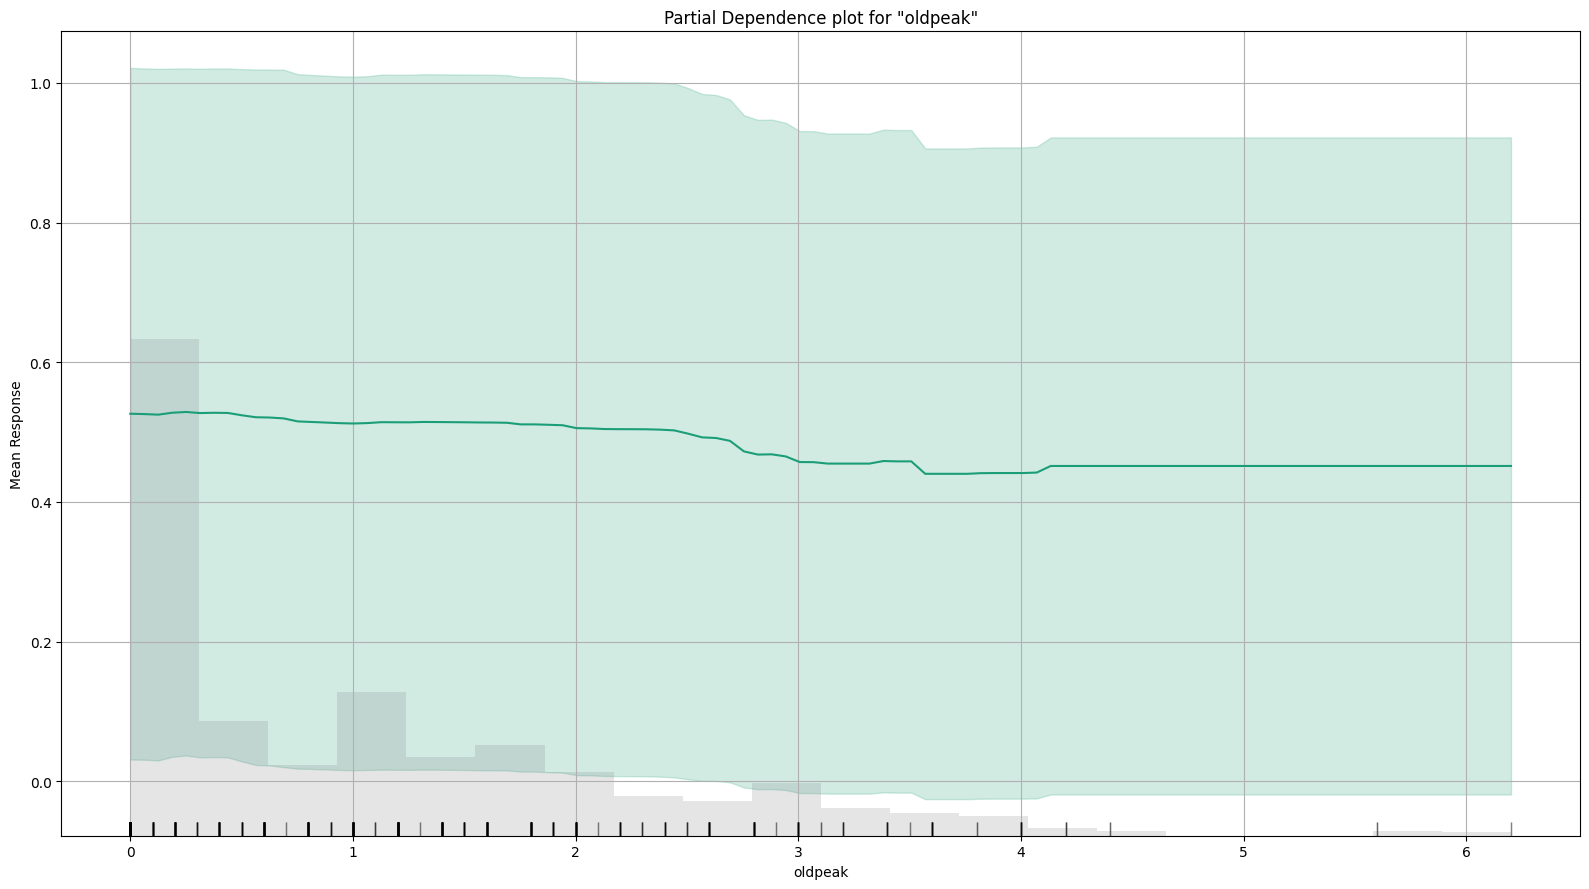

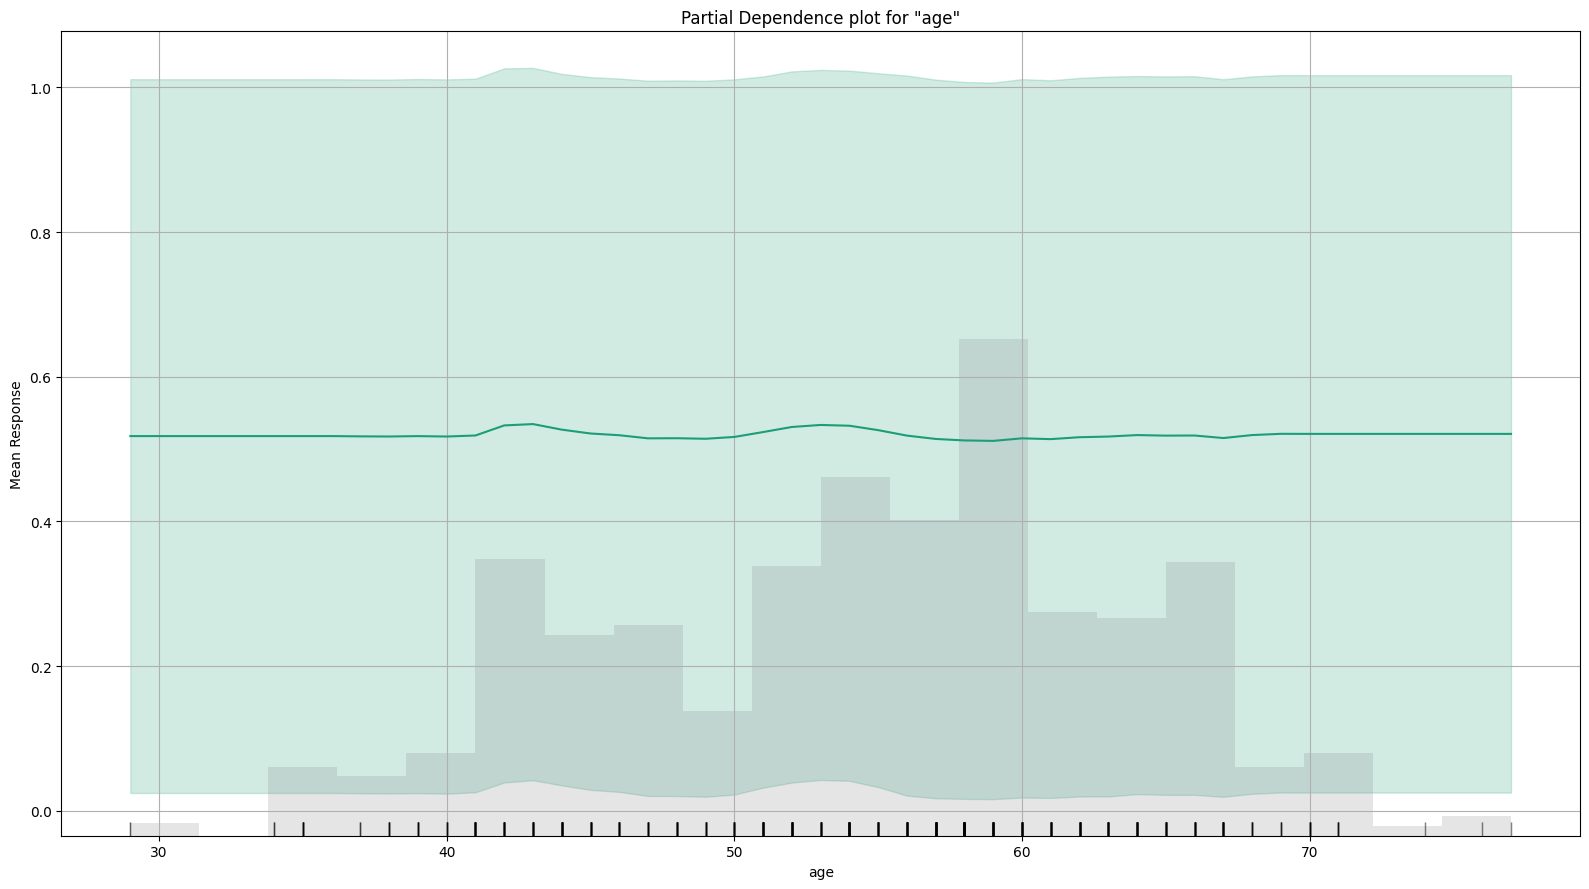

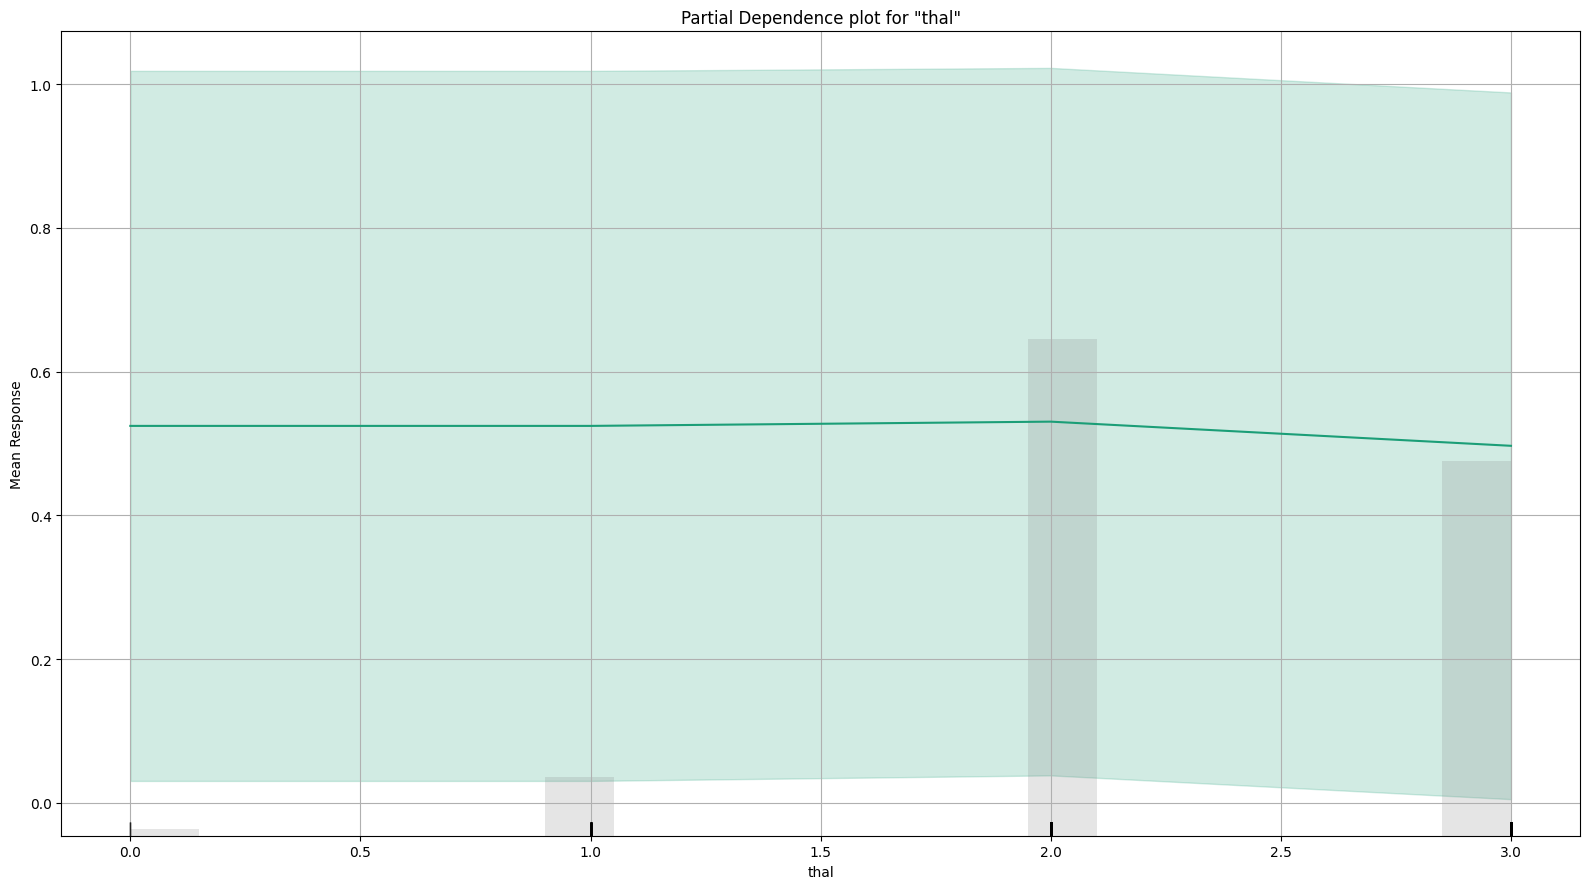

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_3_AutoML_1_20240205_135250

,0,1,Error,Rate
0,499.0,0.0,0.0,(0.0/499.0)
1,0.0,526.0,0.0,(0.0/526.0)
Total,499.0,526.0,0.0,(0.0/1025.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

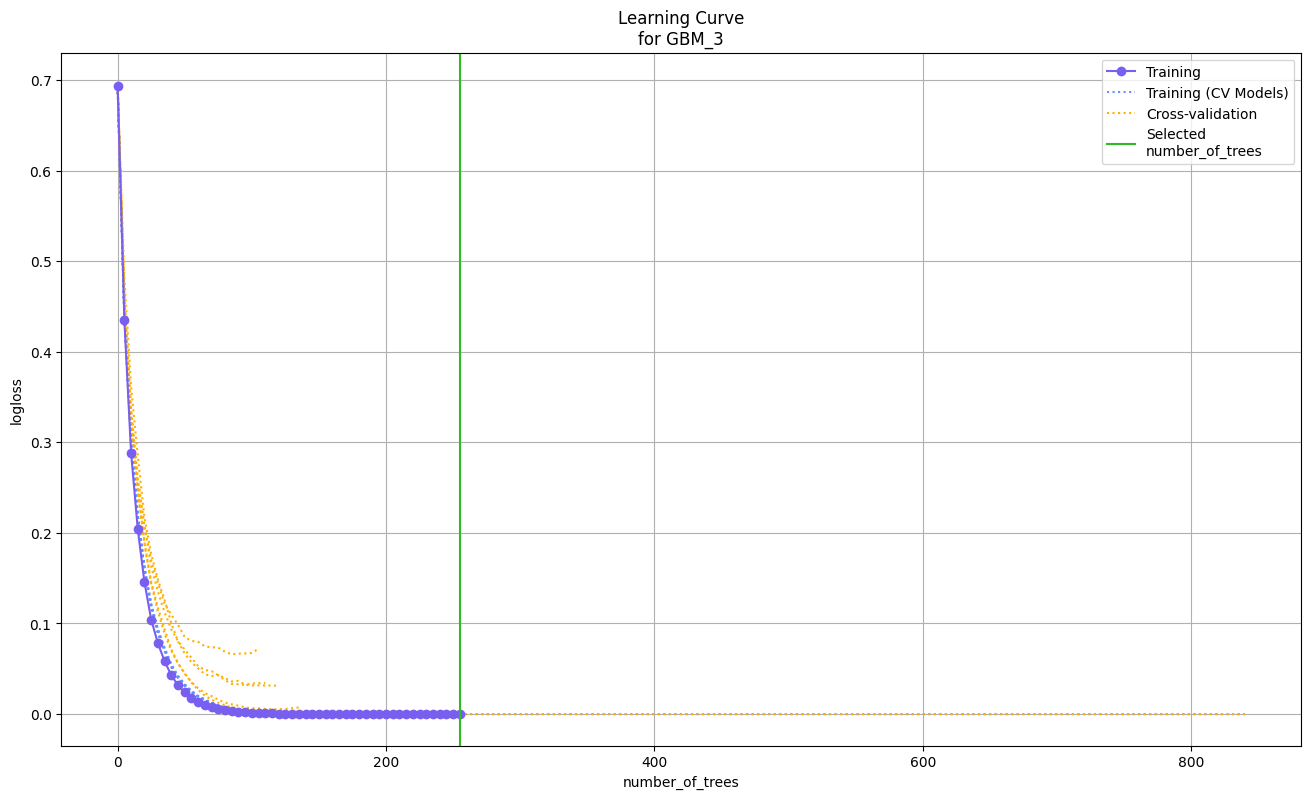

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

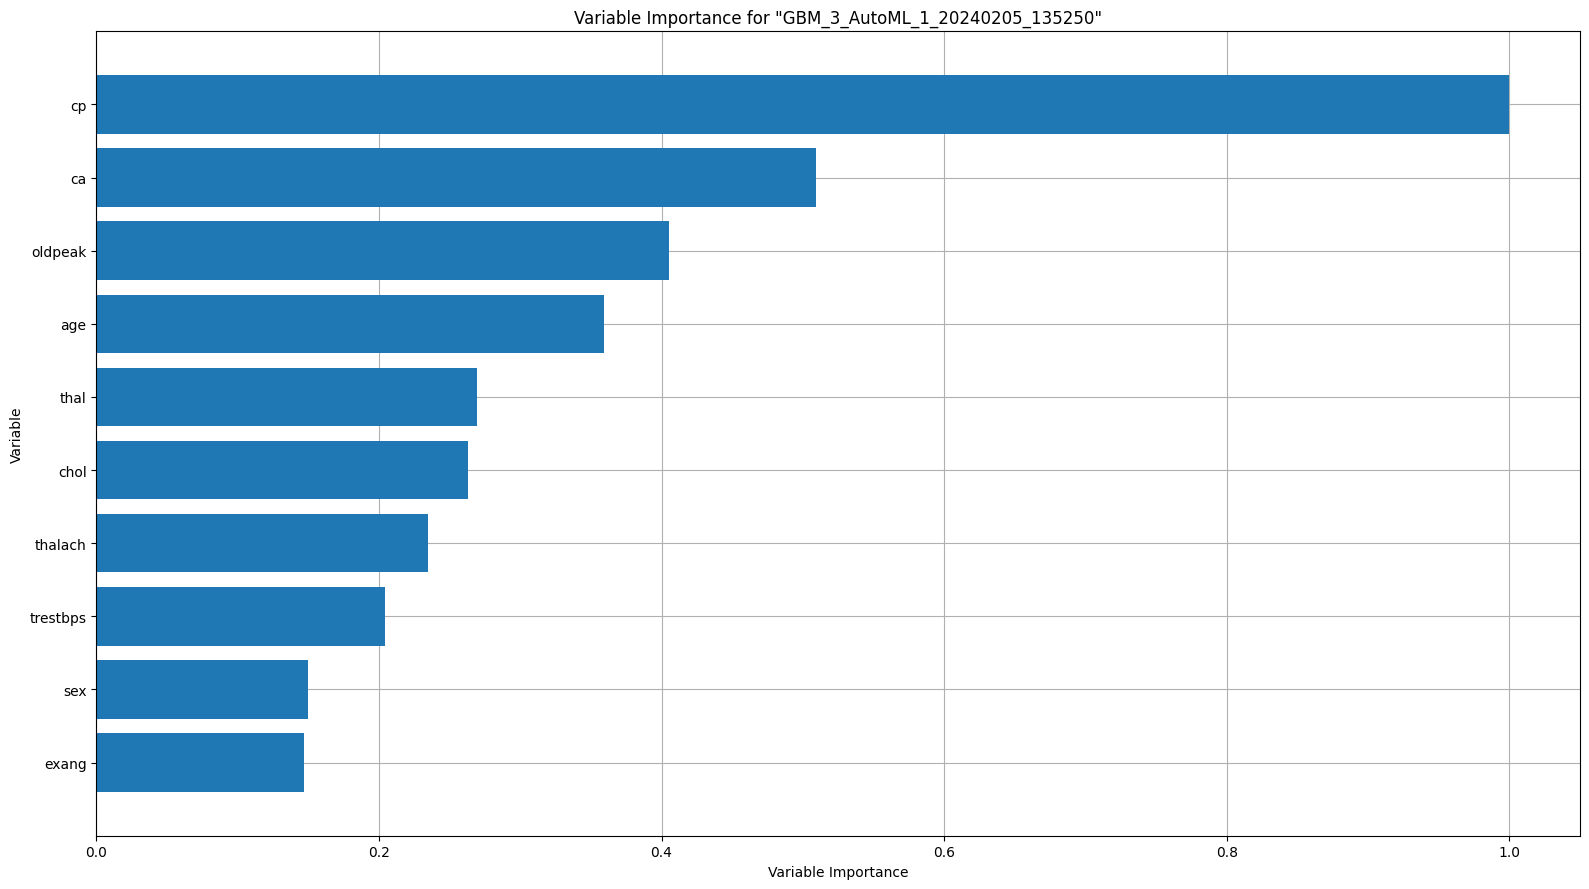

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

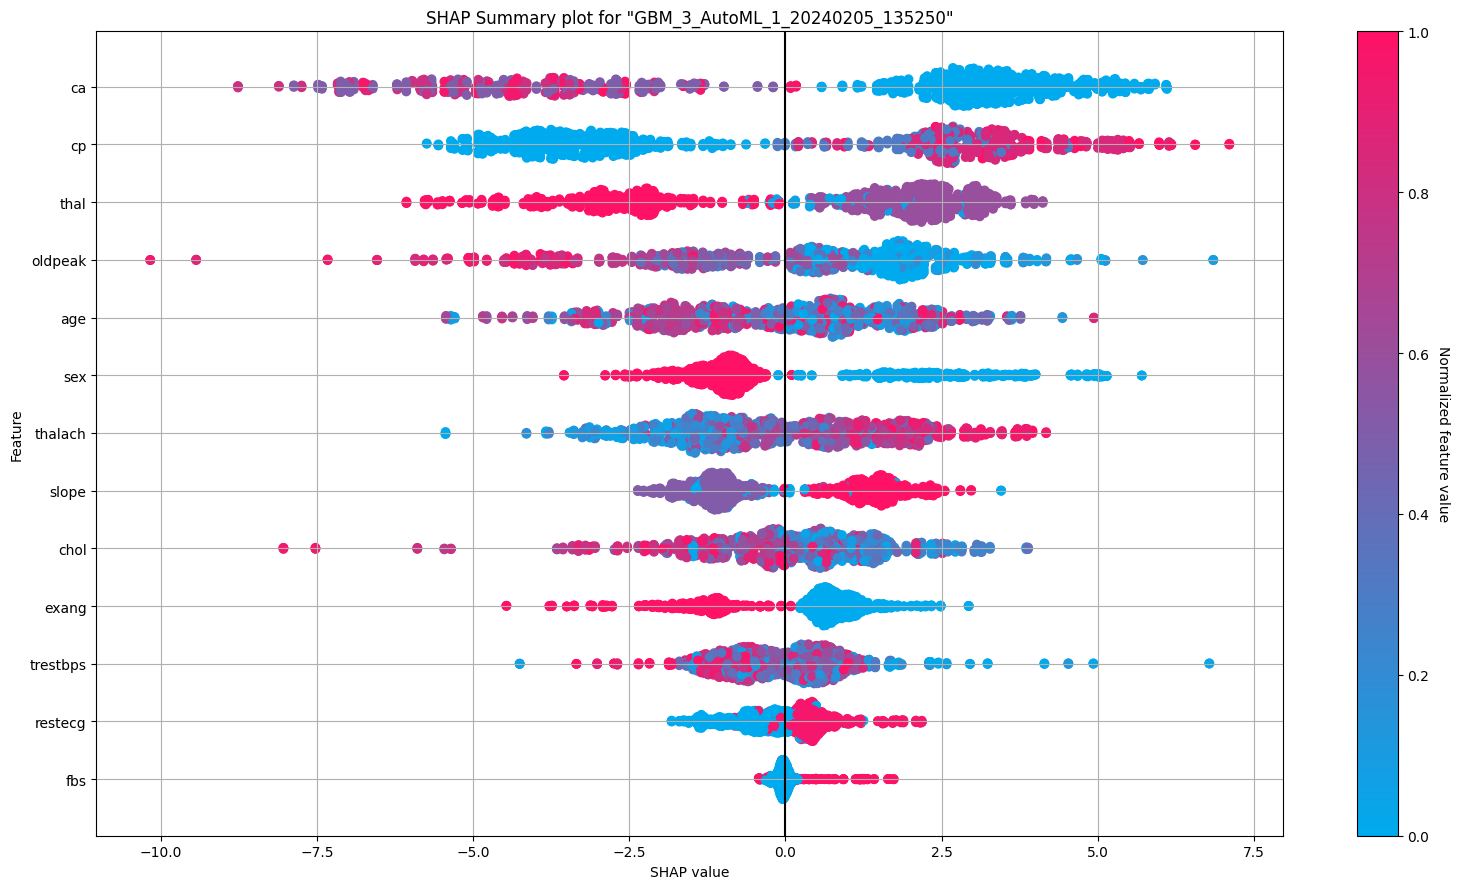

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

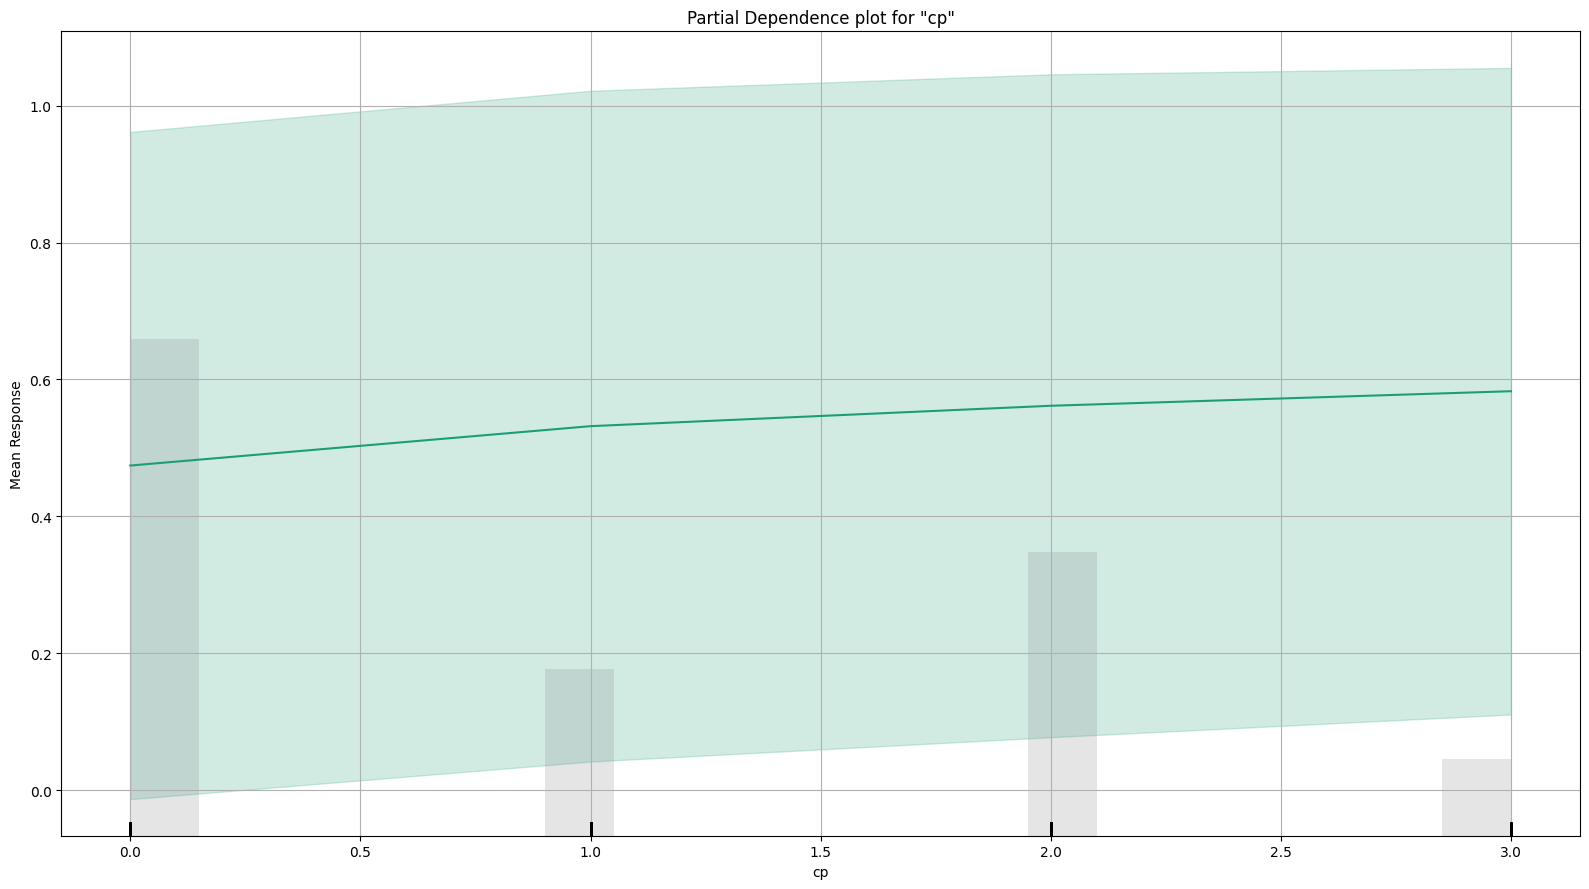

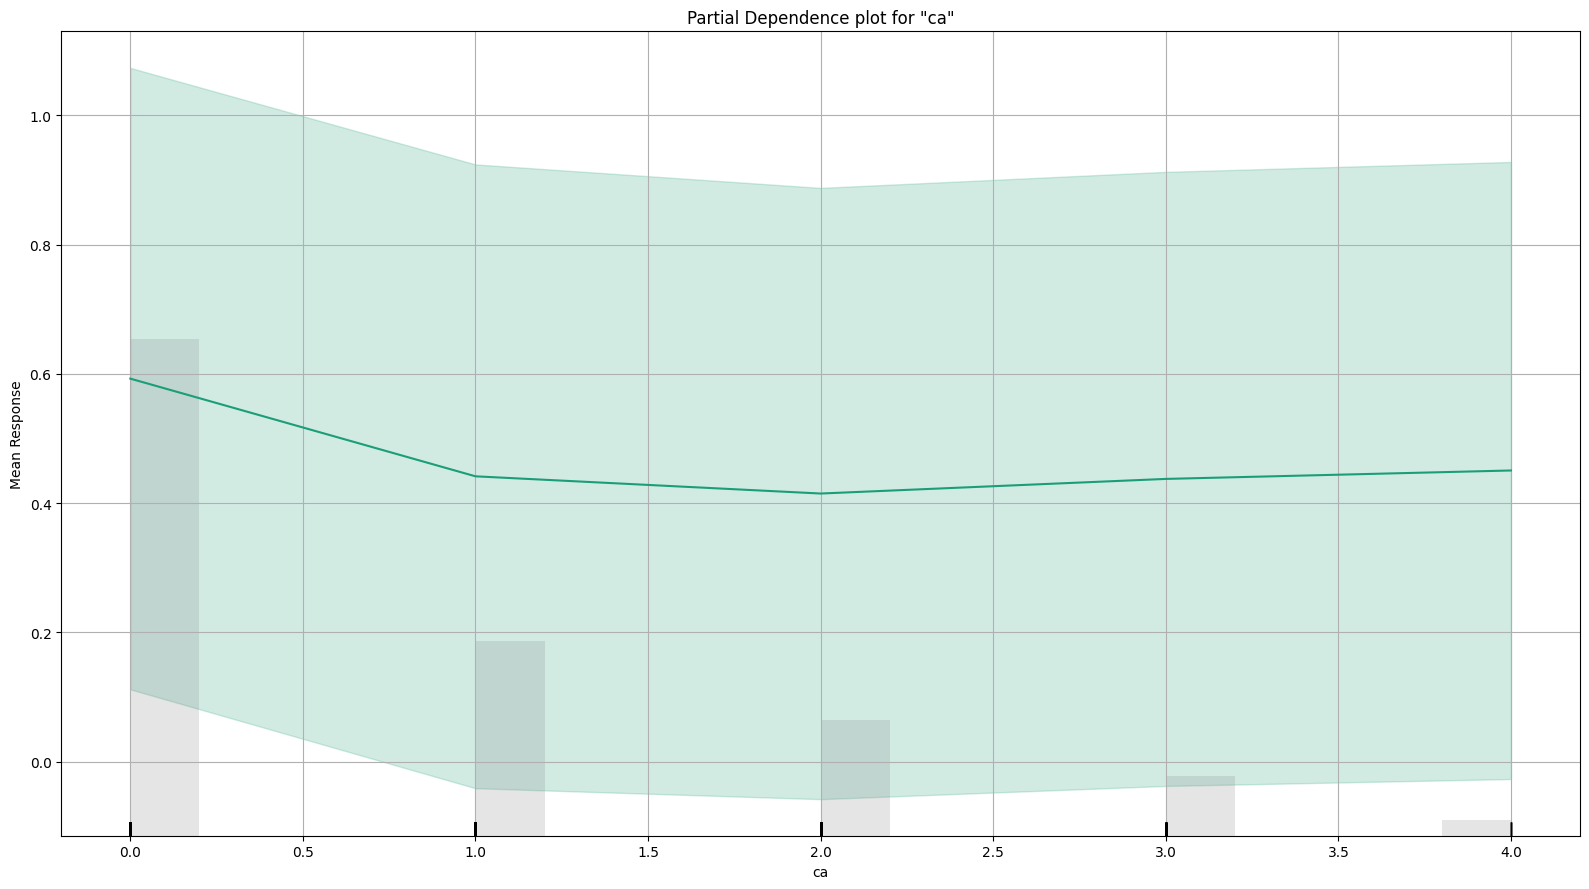

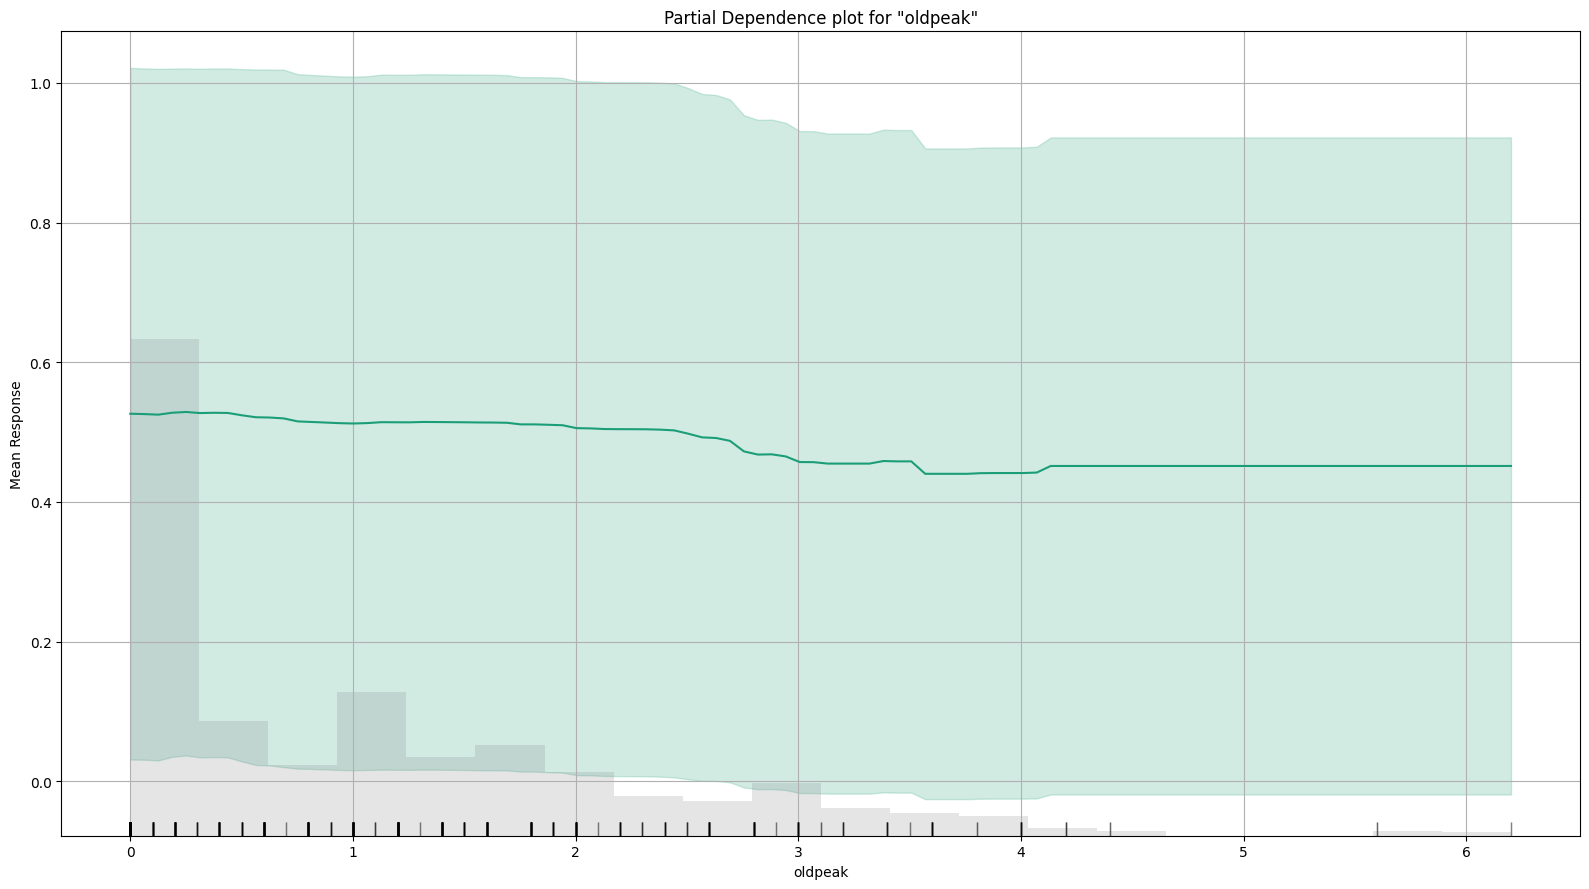

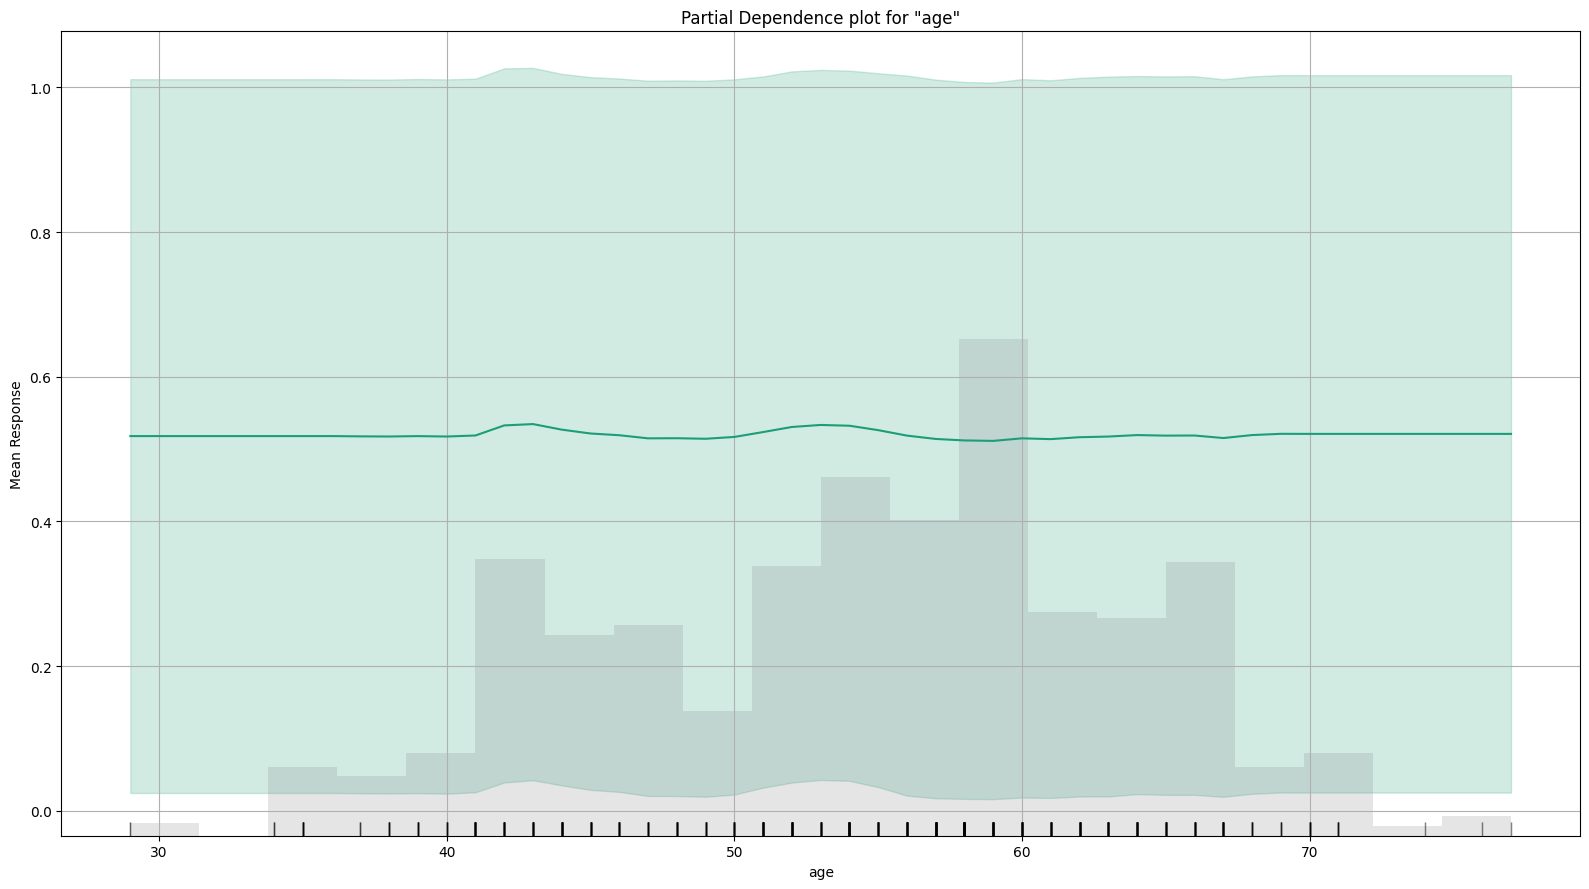

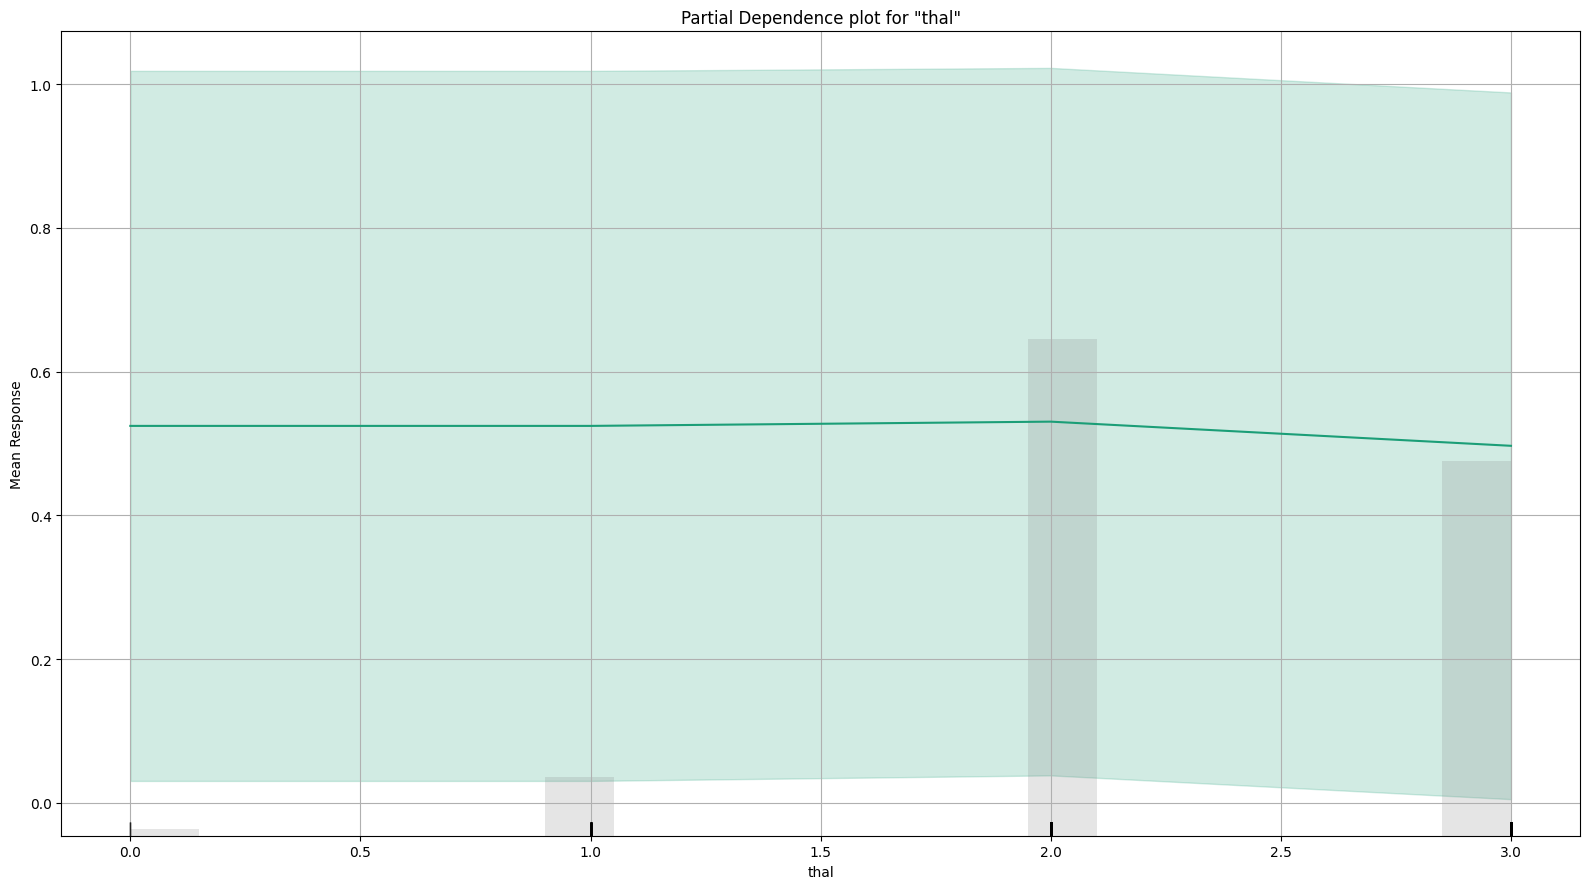

In [ ]:
best_model.explain(h2o_df)

In [ ]:
best_model.model_performance(valid=True)

In [ ]:
type(best_model)

h2o.estimators.gbm.H2OGradientBoostingEstimator

In [ ]:
best_model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_3_AutoML_1_20240205_135250


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    255                255                         163145                 6            8            7.99216       19            60            46.1216

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 3.4251787246287406e-13
RMSE: 5.852502648123058e-07
LogLoss: 4.050784421329385e-07
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9999980890364183
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      499  0    0        (0.0/499.0)
1      0    526  0        (0.0/526.0)
Total  499  526  0        (0.0/1025.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.999998     1         26
max f2                       0.999998     1         26
max f0point5                 0.999998     1         26
max accuracy                 0.999998     1         26
max precision                1            1         0
max recall                   0.999998     1         26
max specificity              1            1         0
max absolute_mcc             0.999998     1         26
max min_per_class_accuracy   0.999998     1         26
max mean_per_class_accuracy  0.999998     1         26
max tns                      1            499       0
max fns                      1            475       0
max fps                      7.4575e-10   499       164
max tps                      0.999998     526       26
max tnr                      1            1         0
max fnr                      1            0.903042  0
max fpr                      7.4575e-10   1         164
max tpr                      0.999998     1         26

Gains/Lift Table: Avg response rate: 51.32 %, avg score: 51.32 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0117073                   1                  1.94867   1.94867            1                1            1                           1                   0.0228137       0.0228137                  94.8669   94.8669            0.0228137
2        0.0204878                   1                  1.94867   1.94867            1                1            1                           1                   0.0171103       0.039924                   94.8669   94.8669            0.039924
3        0.0321951                   1                  1.94867   1.94867            1                1            1                           1                   0.0228137       0.0627376                  94.8669   94.8669            0.0627376
4        0.0419512                   1                  1.94867   1.94867            1                1            1                           1                   0.0190114       0.081749                   94.8669   94.8669            0.081749
5        0.0526829                   1                  1.94867   1.94867            1                1            1                           1                   0.0209125       0.102662                   94.8669   9

In [ ]:
model_performance = best_model.model_performance(h2o_df)
model_performance

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 3.425182306166096e-13
RMSE: 5.85250570795629e-07
LogLoss: 4.0507905982568205e-07
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.99999808904113
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      499  0    0        (0.0/499.0)
1      0    526  0        (0.0/526.0)
Total  499  526  0        (0.0/1025.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.999998     1         163
max f2                       0.999998     1         163
max f0point5                 0.999998     1         163
max accuracy                 0.999998     1         163
max precision                1            1         0
max recall                   0.999998     1         163
max specificity              1            1         0
max absolute_mcc             0.999998     1         163
max min_per_class_accuracy   0.999998     1         163
max mean_per_class_accuracy  0.999998     1         163
max tns                      1            499       0
max fns                      1            523       0
max fps                      7.4575e-10   499       301
max tps                      0.999998     526       163
max tnr                      1            1         0
max fnr                      1            0.994297  0
max fpr                      7.4575e-10   1         301
max tpr                      0.999998     1         163

Gains/Lift Table: Avg response rate: 51.32 %, avg score: 51.32 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0117073                   1                  1.94867   1.94867            1                1            1                           1                   0.0228137       0.0228137                  94.8669   94.8669            0.0228137
2        0.0204878                   1                  1.94867   1.94867            1                1            1                           1                   0.0171103       0.039924                   94.8669   94.8669            0.039924
3        0.0321951                   1                  1.94867   1.94867            1                1            1                           1                   0.0228137       0.0627376                  94.8669   94.8669            0.0627376
4        0.0419512                   1                  1.94867   1.94867            1                1            1                           1                   0.0190114       0.081749                   94.8669   94.8669            0.081749
5        0.0526829                   1                  1.94867   1.94867            1                1            1                           1                   0.0209125       0.102662                   94.8669   94.8669            0.102662
6        0.102439                    1                  1.94867   1.94867            1                1            1                           1                   0.0969582       0.19962                    94.8669   94.8669            0.19962
7        0.153171                    1                  1.94867   1.94867            1                1            1                           1                   0.0988593       0.298479                   94.8669   94.8669            0.298479
8        0.200976                    1                  1.94867   1.94867            1

In [ ]:
variable_importance = best_model.varimp()
print(variable_importance)

[('cp', 317.17572021484375, 1.0, 0.26836136880335665), ('ca', 161.4800262451172, 0.5091184978968007, 0.1366277369786943), ('oldpeak', 128.52383422851562, 0.40521334401466186, 0.1087436076571601), ('age', 114.06958770751953, 0.359641613268042, 0.09651391561525918), ('thal', 85.34595489501953, 0.26908098399590347, 0.07221094118409475), ('chol', 83.53667449951172, 0.26337663690942953, 0.07068011479183918), ('thalach', 74.48625946044922, 0.23484224899054326, 0.06302258739196089), ('trestbps', 64.8199234008789, 0.20436596898707177, 0.05484393117419491), ('sex', 47.56352996826172, 0.149959555340629, 0.0402433515363539), ('exang', 46.711265563964844, 0.14727251358434457, 0.03952225333260564), ('slope', 33.020729064941406, 0.10410862799515146, 0.027938733913018297), ('restecg', 19.225021362304688, 0.06061315585342513, 0.016266229472316356), ('fbs', 5.939306259155273, 0.018725601868680854, 0.005025228149145886)]


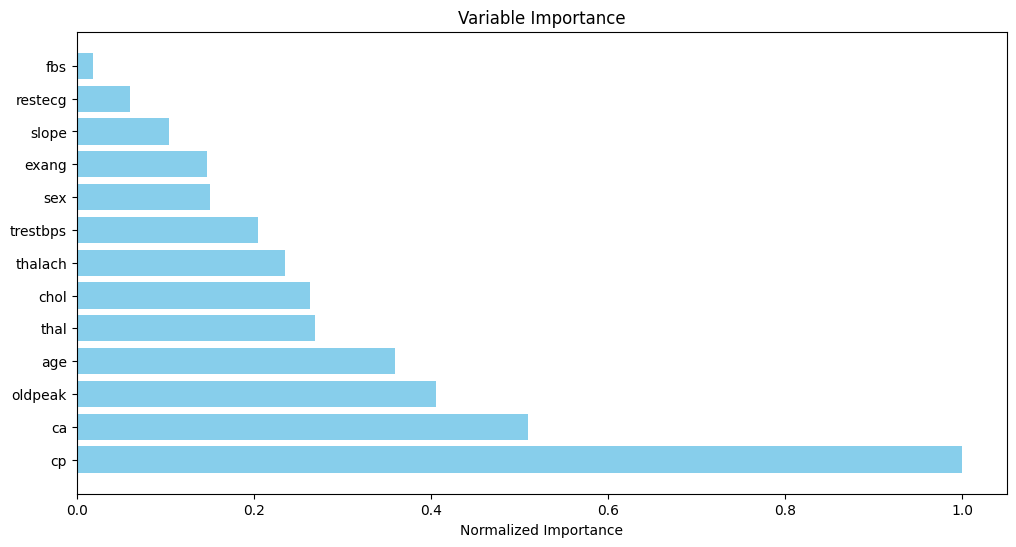

In [ ]:
import matplotlib.pyplot as plt

# Provided variable importance values
variable_importance = [
    ('cp', 317.17572021484375, 1.0, 0.26836136880335665),
    ('ca', 161.4800262451172, 0.5091184978968007, 0.1366277369786943),
    ('oldpeak', 128.52383422851562, 0.40521334401466186, 0.1087436076571601),
    ('age', 114.06958770751953, 0.359641613268042, 0.09651391561525918),
    ('thal', 85.34595489501953, 0.26908098399590347, 0.07221094118409475),
    ('chol', 83.53667449951172, 0.26337663690942953, 0.07068011479183918),
    ('thalach', 74.48625946044922, 0.23484224899054326, 0.06302258739196089),
    ('trestbps', 64.8199234008789, 0.20436596898707177, 0.05484393117419491),
    ('sex', 47.56352996826172, 0.149959555340629, 0.0402433515363539),
    ('exang', 46.711265563964844, 0.14727251358434457, 0.03952225333260564),
    ('slope', 33.020729064941406, 0.10410862799515146, 0.027938733913018297),
    ('restecg', 19.225021362304688, 0.06061315585342513, 0.016266229472316356),
    ('fbs', 5.939306259155273, 0.018725601868680854, 0.005025228149145886)
]

# Extract information for plotting
feature_names, raw_importance, normalized_importance, percentage_importance = zip(*variable_importance)

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(feature_names, normalized_importance, color='skyblue')
plt.xlabel('Normalized Importance')
plt.title('Variable Importance')
plt.show()


In [ ]:
best_model = aml.leader
hyperparameters = best_model.params
print(hyperparameters)

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_3_AutoML_1_20240205_135250', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_3_AutoML_1_20240205_135250'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20240205_135250_training_py_1_sid_94f0', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20240205_135250_training_py_1_sid_94f0'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20240205_135250_training_py_1_sid_94f0', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20240205_135250_training_py_1_sid_94f0'}}, 'validation_frame': {'default': None, 'actual': None, 'input': None}, 'nfolds': {'default': 0, 'actual': 5, 'input': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False, 'input'

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = df[df.columns[:-1]]
y = df['target']
# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set hyperparameters based on the H2O GBM parameters
hyperparameters = {
    'n_estimators': 255,       # ntrees
    'max_depth': 8,            # max_depth
    'min_samples_split': 10,   # min_rows
    'learning_rate': 0.1,      # learn_rate
    'subsample': 0.8,          # sample_rate
    'max_features': 0.8,       # col_sample_rate
    'random_state': 7          # seed
}




In [ ]:
# Create and train the scikit-learn Gradient Boosting Classifier
sklearn_gbm_model = GradientBoostingClassifier(**hyperparameters)
sklearn_gbm_model.fit(X_train, y_train)



GradientBoostingClassifier(max_depth=8, max_features=0.8, min_samples_split=10,
                           n_estimators=255, random_state=7, subsample=0.8)

In [ ]:
# Make predictions
predictions = sklearn_gbm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9853658536585366


In [ ]:
import pickle

# Save the scikit-learn Gradient Boosting Classifier model as a pickle file
  with open("sklearn_gbm_model.pkl", "wb") as file:
      pickle.dump(sklearn_gbm_model, file)

Precision: 1.0
Recall: 0.970873786407767
Accuracy: 0.9853658536585366


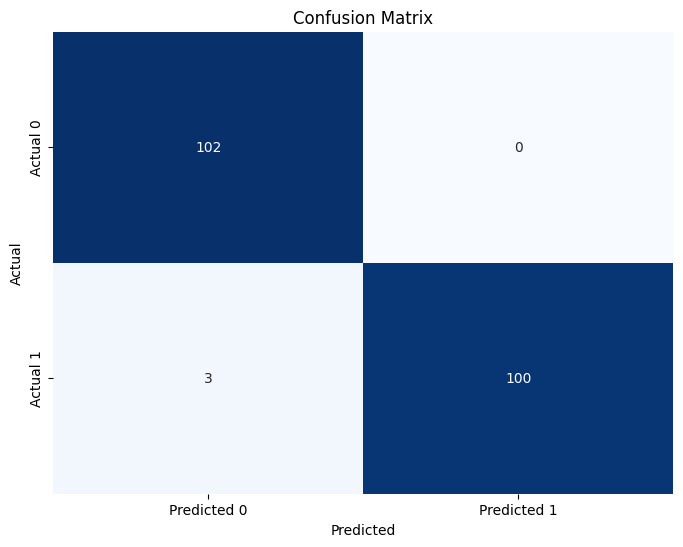

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming predictions and y_test are available from the previous example
# predictions = sklearn_gbm_model.predict(X_test)
# y_test is the actual target variable

# Calculate precision, recall, and accuracy
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

# Create confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from google.colab import files

# Save the H2O model
model_path = h2o.save_model(model=best_model, path="/content/best_model", force=True)



1    713
0    312
Name: sex, dtype: int64

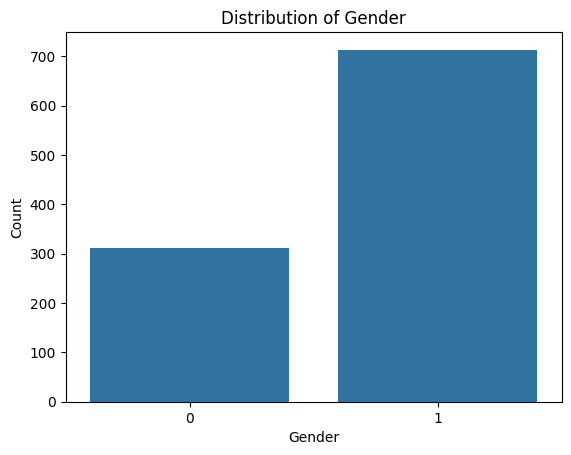

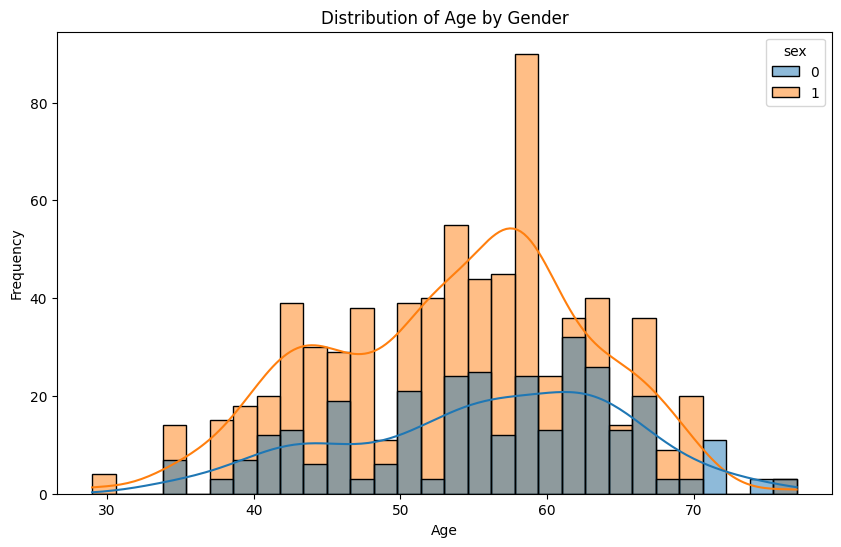

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is loaded into a DataFrame called 'df'

# Check the distribution of the 'sex' attribute
sns.countplot(x='sex', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Check the distribution of 'age' across different genders
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='sex', bins=30, kde=True)
plt.title('Distribution of Age by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Ensure stratified sampling during train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df['sex'], random_state=42)


In [ ]:
%pip install aif360

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
%pip install fairlearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 25.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvi

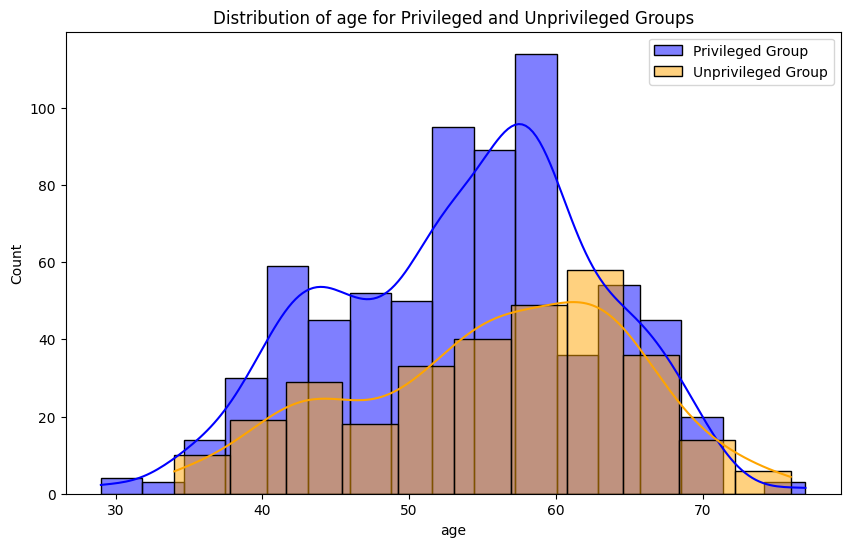

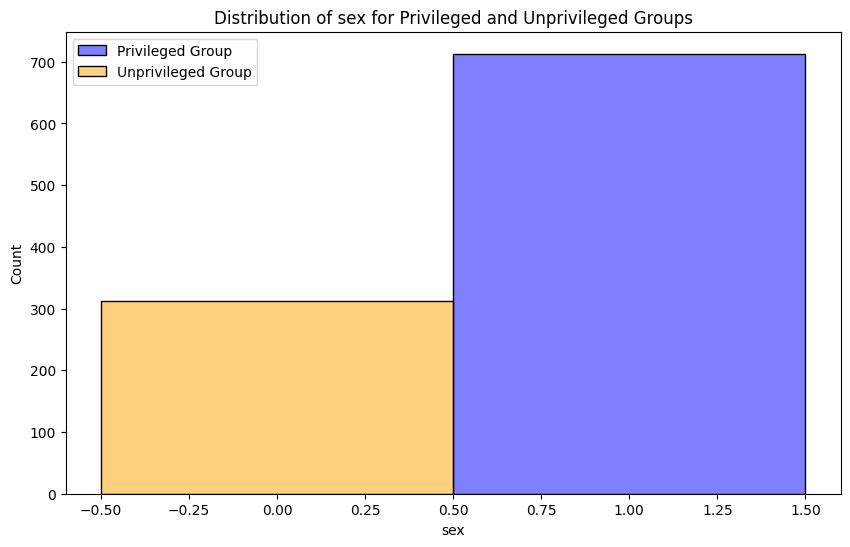

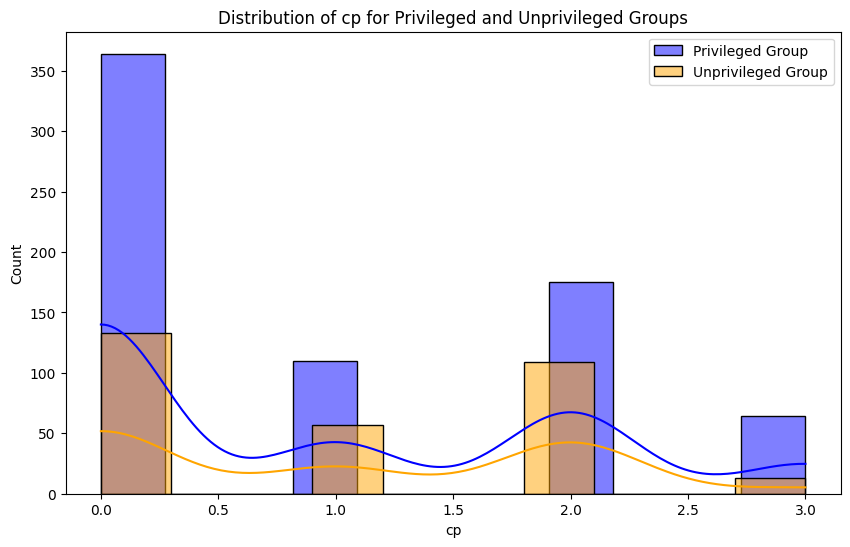

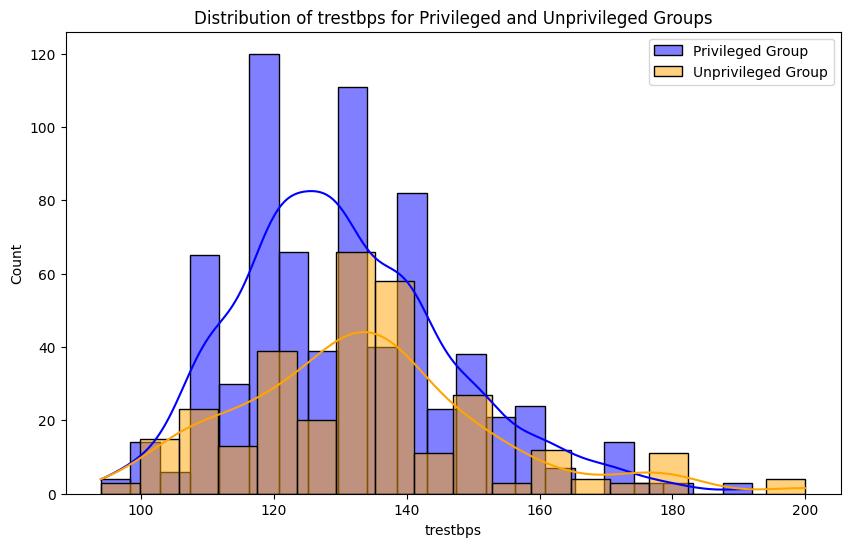

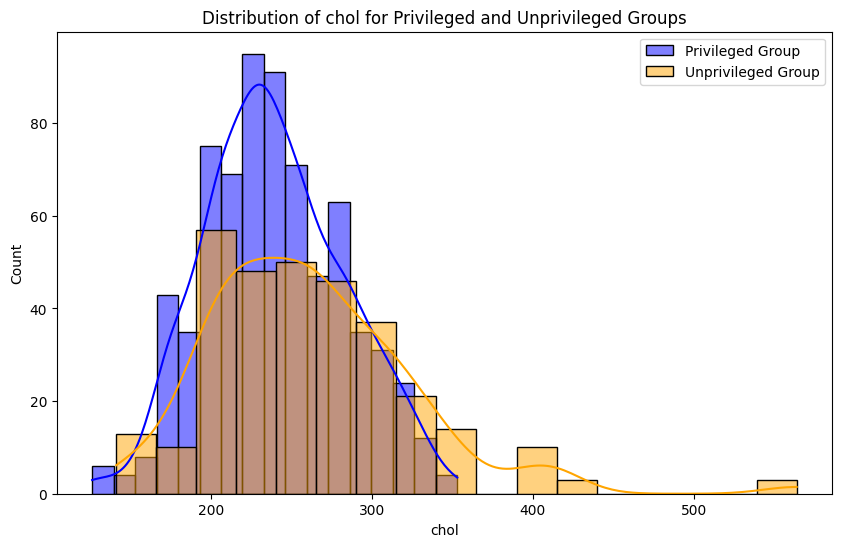

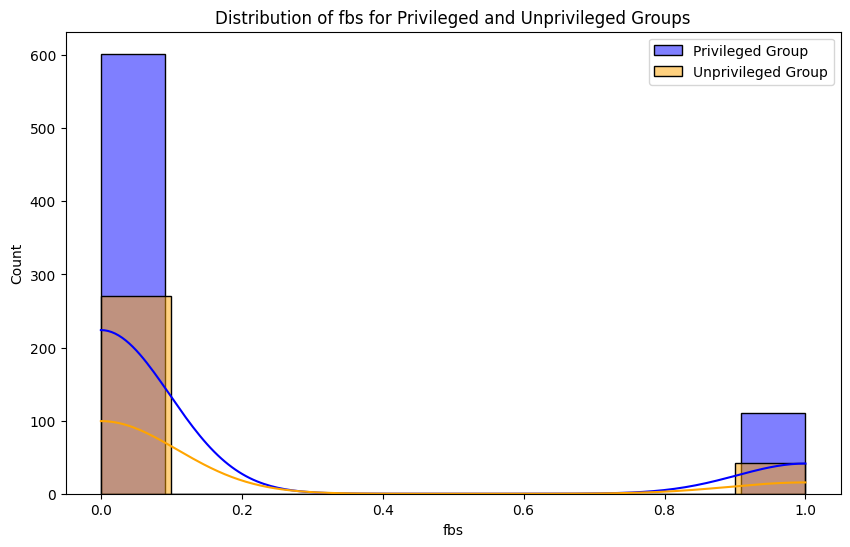

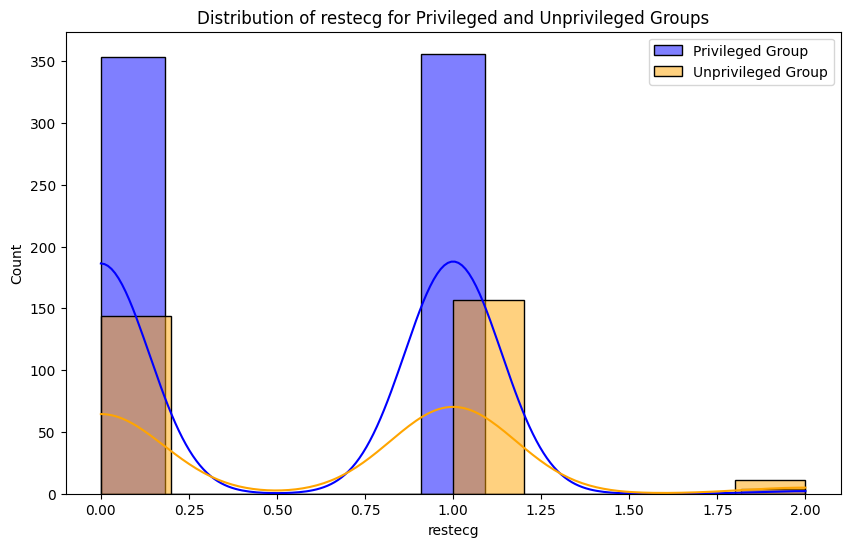

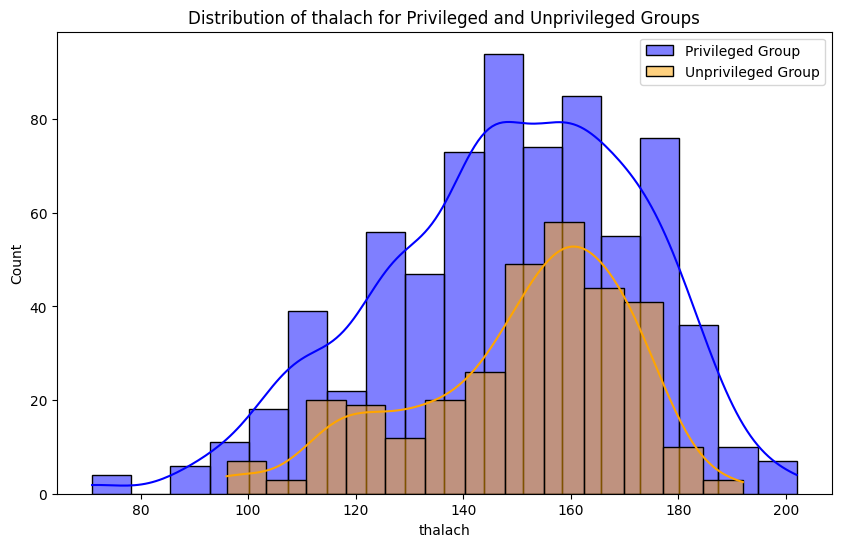

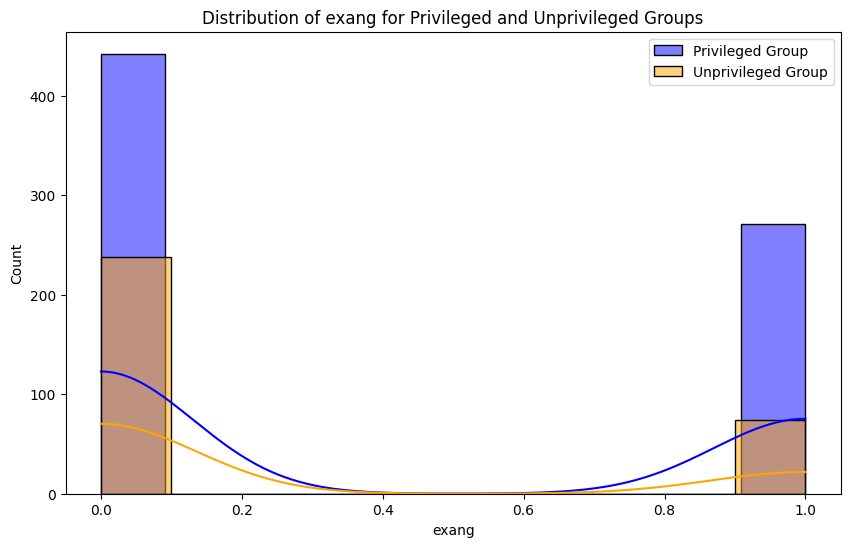

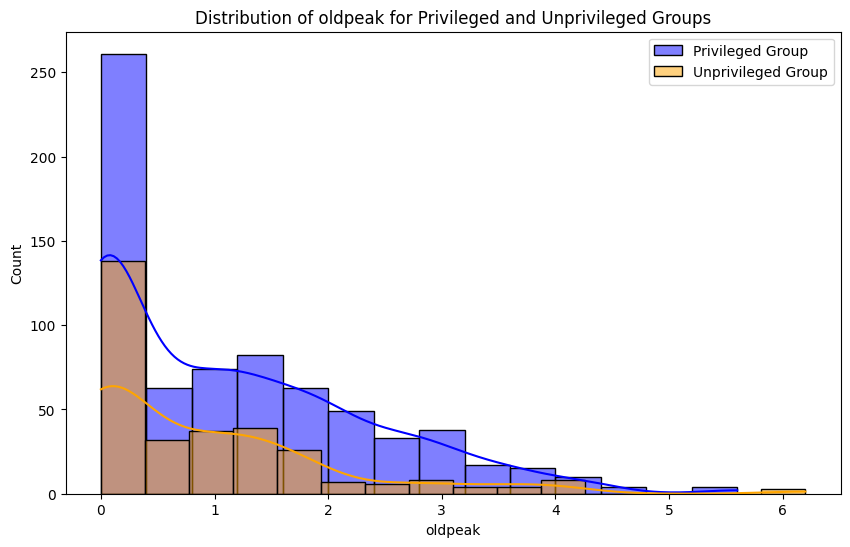

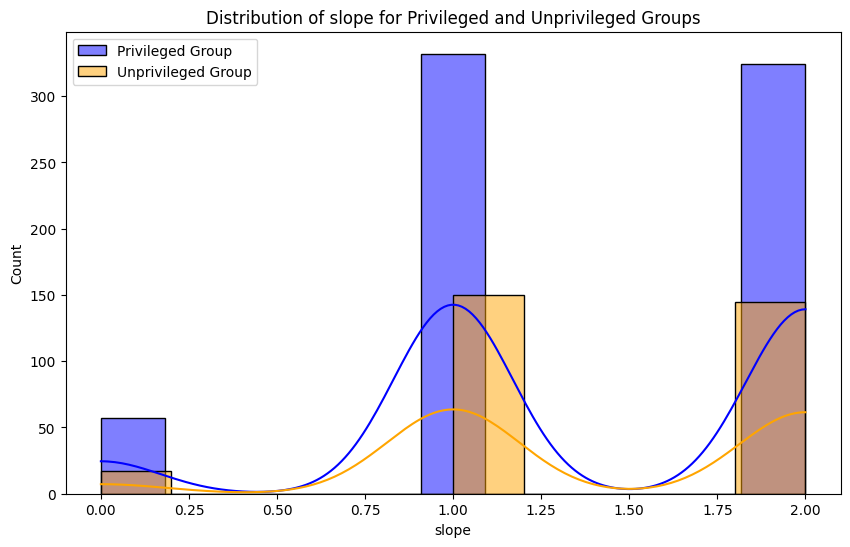

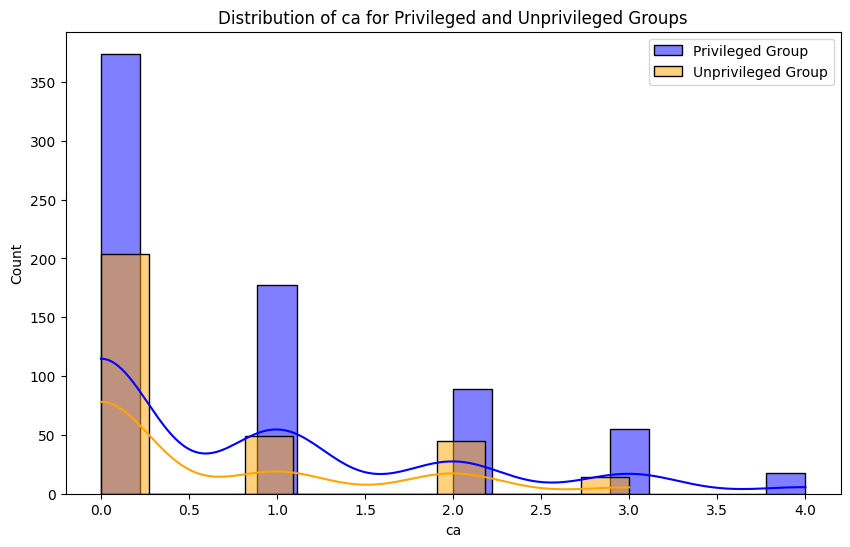

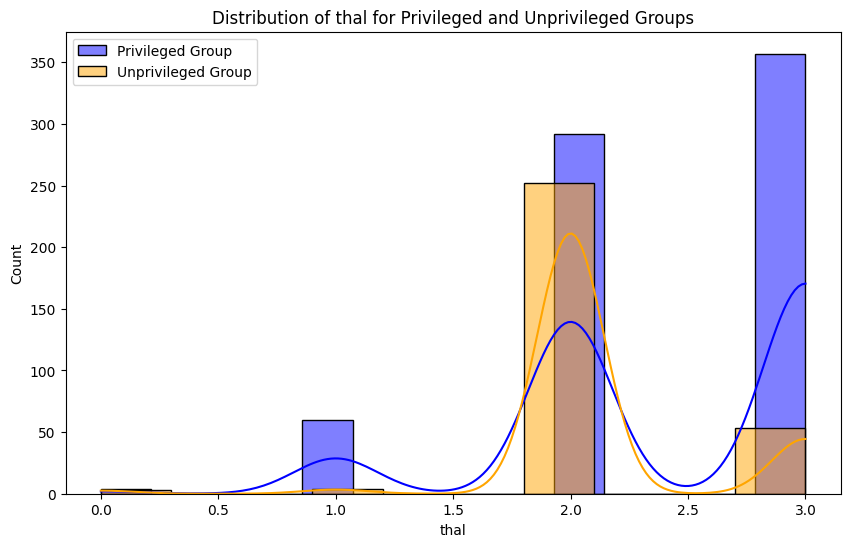

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with the dataset
# Set the sensitive attribute, in this case, 'sex'
sensitive_attribute = 'sex'

# Set the protected groups (0 and 1 for 'sex' column)
privileged_group = df[df[sensitive_attribute] == 1]
unprivileged_group = df[df[sensitive_attribute] == 0]

# Function to plot the distribution of a feature for different groups
def plot_distribution(feature_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(privileged_group[feature_name], label='Privileged Group', kde=True, color='blue', alpha=0.5)
    sns.histplot(unprivileged_group[feature_name], label='Unprivileged Group', kde=True, color='orange', alpha=0.5)
    plt.title(f'Distribution of {feature_name} for Privileged and Unprivileged Groups')
    plt.legend()
    plt.show()

# Loop through each column to plot the distribution
columns_to_check = df.columns[:-1]  # Exclude the target column
for column in columns_to_check:
    plot_distribution(column)


In [ ]:
df.cp

NameError: name 'df' is not defined